### **<center><font style="color:rgb(100,109,254)">Linear Regression on Boston Dataset</font> </center>**

### 01. Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

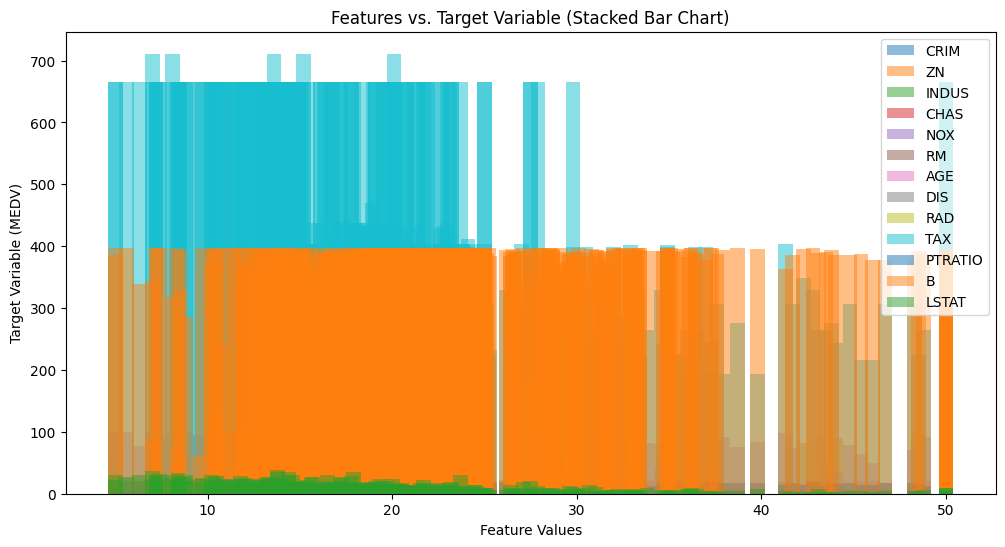

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# Load the Boston dataset
boston = load_boston()
X = boston.data  # Features
y = boston.target  # Target variable (median home values)

# Get the feature names
feature_names = boston.feature_names

# Create a single bar chart with all features
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through each feature and plot it as a stacked bar
for i in range(X.shape[1]):
    ax.bar(y, X[:, i], label=feature_names[i], alpha=0.5)

ax.set_xlabel("Feature Values")
ax.set_ylabel("Target Variable (MEDV)")
ax.set_title("Features vs. Target Variable (Stacked Bar Chart)")
ax.legend()
plt.show()


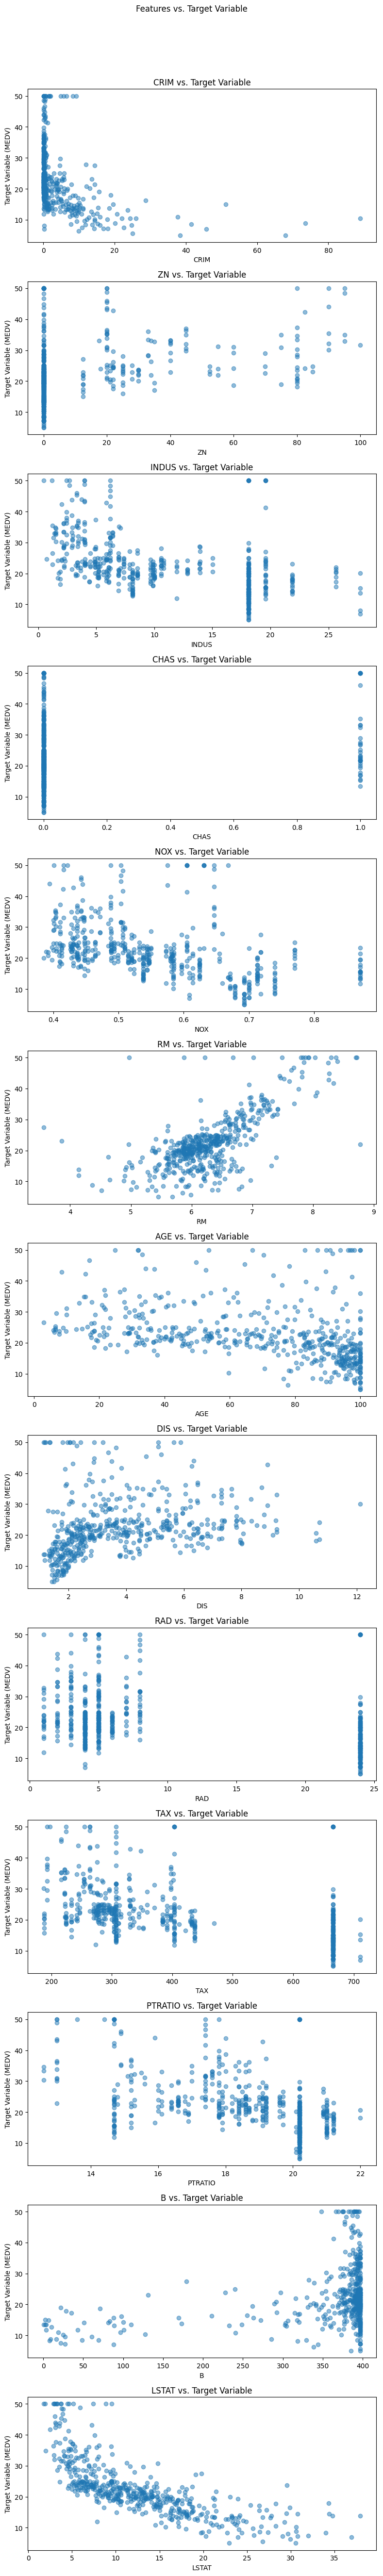

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# Load the Boston dataset
boston = load_boston()
X = boston.data  # Features
y = boston.target  # Target variable (median home values)

# Get the feature names
feature_names = boston.feature_names

# Create subplots for each feature
n_features = X.shape[1]

fig, axes = plt.subplots(n_features, 1, figsize=(8, 4 * n_features))
fig.suptitle("Features vs. Target Variable", y=1.02)

for i in range(n_features):
    axes[i].scatter(X[:, i], y, alpha=0.5)
    axes[i].set_ylabel("Target Variable (MEDV)")
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_title(f"{feature_names[i]} vs. Target Variable")

plt.tight_layout()
plt.show()


### 02. Import the Dataset

In [2]:
boston = datasets.load_boston()
boston

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### 03. Transform the Data into dataframe

* `data:` Independent variables also known as x values
* `feature_names:` the column names of the data
* `target:` dependent variable or y values 

In [3]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

### 04. Get some Statistics from dataset

In [4]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 05. Split the Dataset into Training and Testing 

In [6]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

### 06. Initialize the Linear Regression Model

In [5]:
model = linear_model.LinearRegression()

### 07. Train the Model

In [7]:
model.fit(xTrain, yTrain)

LinearRegression()

### 08. Print the coefficient and intercept

In [8]:
model.coef_

array([[-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,
         3.23866812e+00, -1.61698120e+01,  3.90205116e+00,
        -1.28507825e-02, -1.42222430e+00,  2.34853915e-01,
        -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
        -5.47566338e-01]])

In [9]:
model.intercept_

array([33.33497576])

### 09. Make the Predictions 

In [10]:
yPred = model.predict(xTest)
yPred

array([[28.53469469],
       [36.6187006 ],
       [15.63751079],
       [25.5014496 ],
       [18.7096734 ],
       [23.16471591],
       [17.31011035],
       [14.07736367],
       [23.01064388],
       [20.54223482],
       [24.91632351],
       [18.41098052],
       [-6.52079687],
       [21.83372604],
       [19.14903064],
       [26.0587322 ],
       [20.30232625],
       [ 5.74943567],
       [40.33137811],
       [17.45791446],
       [27.47486665],
       [30.2170757 ],
       [10.80555625],
       [23.87721728],
       [17.99492211],
       [16.02608791],
       [23.268288  ],
       [14.36825207],
       [22.38116971],
       [19.3092068 ],
       [22.17284576],
       [25.05925441],
       [25.13780726],
       [18.46730198],
       [16.60405712],
       [17.46564046],
       [30.71367733],
       [20.05106788],
       [23.9897768 ],
       [24.94322408],
       [13.97945355],
       [31.64706967],
       [42.48057206],
       [17.70042814],
       [26.92507869],
       [17

In [13]:
yTest # actual values

,0
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
110,21.7
321,23.1
265,22.8
29,21.0


### 10. Accuracy Check

In [19]:
model.score(xTrain, yTrain)

0.7392344370995025

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yPred, yTest)

20.72402343733979